In [8]:
# Restart kernel to reload updated modules
import sys

print("=" * 70)
print("⚠️  KERNEL RESTART REQUIRED")
print("=" * 70)
print("\nThe AutoML modules were updated with fixes for:")
print("  • Text preprocessing (text_col parameter)")
print("  • Feature selection for sparse text data")
print("\nPlease restart the Jupyter kernel NOW:")
print("  1. Press Ctrl+Shift+P")
print("  2. Type 'Restart Kernel'")
print("  3. Select 'Jupyter: Restart Kernel'")
print("  4. Click 'Restart' when prompted")
print("\nAfter restarting, skip this cell and run from Cell 2.")
print("=" * 70)

# After restart, continue from Cell 2

⚠️  KERNEL RESTART REQUIRED

The AutoML modules were updated with fixes for:
  • Text preprocessing (text_col parameter)
  • Feature selection for sparse text data

Please restart the Jupyter kernel NOW:
  1. Press Ctrl+Shift+P
  2. Type 'Restart Kernel'
  3. Select 'Jupyter: Restart Kernel'
  4. Click 'Restart' when prompted

After restarting, skip this cell and run from Cell 2.


## 1. Setup and Imports

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Add parent directory to path
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))

from automl.pipeline import run_pipeline

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Imports successful!")

✅ Imports successful!


## 2. Load Text Dataset

We'll use a subset of the 20 Newsgroups dataset for demonstration.

In [2]:
# Load a small subset of 20 newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

print("📥 Loading 20 Newsgroups dataset (subset)...")
newsgroups = fetch_20newsgroups(subset='train', categories=categories, 
                                 shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

# Create DataFrame
df = pd.DataFrame({
    'text': newsgroups.data,
    'target': newsgroups.target
})

# Take a sample for faster processing
df = df.sample(n=500, random_state=42).reset_index(drop=True)

print(f"\nDataset shape: {df.shape}")
print(f"Categories: {newsgroups.target_names}")
print(f"\nTarget distribution:")
print(df['target'].value_counts())

📥 Loading 20 Newsgroups dataset (subset)...

Dataset shape: (500, 2)
Categories: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

Target distribution:
target
2    145
3    139
1    119
0     97
Name: count, dtype: int64


In [3]:
# Display sample texts
print("📄 Sample texts:\n")
for i in range(3):
    print(f"Example {i+1} (Category: {newsgroups.target_names[df.iloc[i]['target']]}):")
    print(df.iloc[i]['text'][:200] + "...")
    print("\n" + "-"*80 + "\n")

📄 Sample texts:

Example 1 (Category: sci.med):

: ... I think they should rename Waco TX to Wacko TX!...

--------------------------------------------------------------------------------

Example 2 (Category: soc.religion.christian):

I've sent the article.  In terms of the group discussion, I wanted to point
out that "non-liberal education" (head in the sand) is not the same as
"abstinence education".

We had "non-liberal educati...

--------------------------------------------------------------------------------

Example 3 (Category: sci.med):



There's a lot of evidence, it just hasn't been adequately gathered and
published in a way that will convince the die-hard melancholic skeptics
who quiver everytime the word 'anecdote' or 'empirical...

--------------------------------------------------------------------------------



## 3. Text Statistics

📊 Text Statistics:
       text_length  word_count
count    500.00000   500.00000
mean    1313.62600   214.26400
std     3645.79405   563.30203
min        0.00000     0.00000
25%      268.00000    44.75000
50%      569.50000    94.50000
75%     1164.25000   199.25000
max    56543.00000  9109.00000


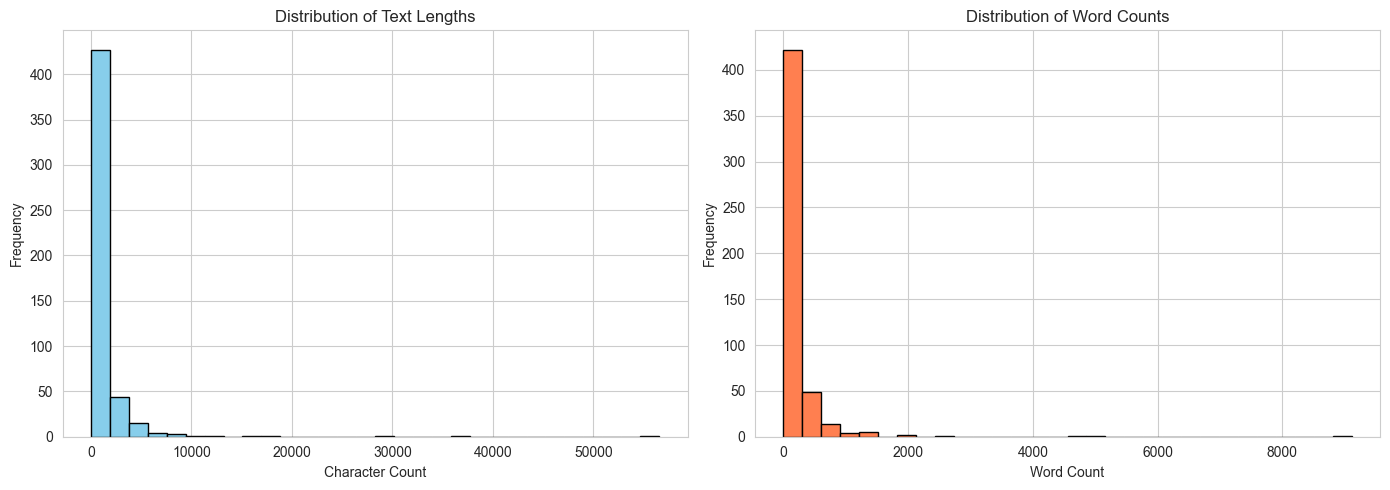

In [4]:
# Calculate text lengths
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

print("📊 Text Statistics:")
print(df[['text_length', 'word_count']].describe())

# Visualize distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['text_length'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Character Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Text Lengths')

axes[1].hist(df['word_count'], bins=30, color='coral', edgecolor='black')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Word Counts')

plt.tight_layout()
plt.show()

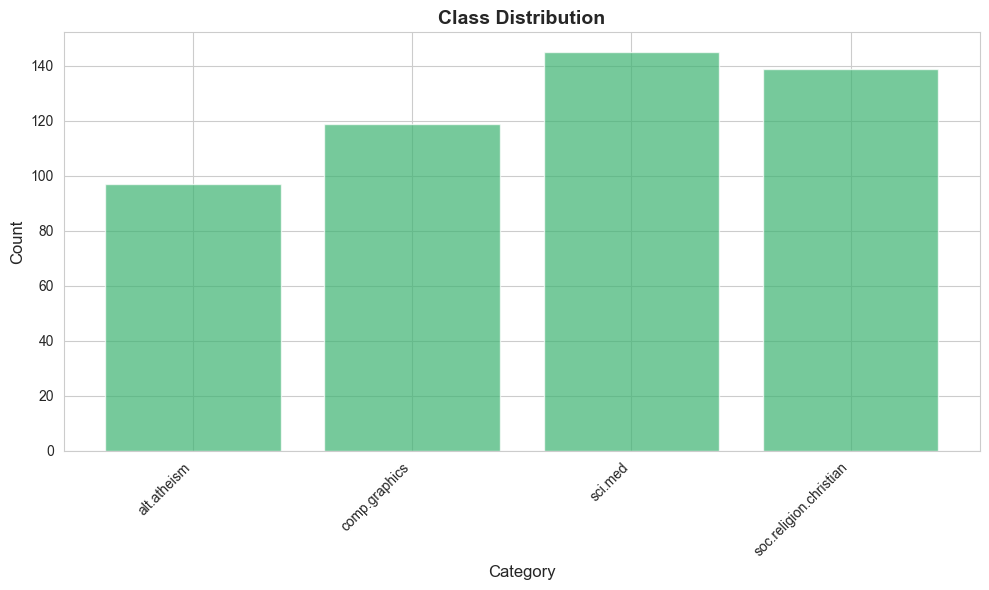

In [5]:
# Class distribution
plt.figure(figsize=(10, 6))
class_counts = df['target'].value_counts().sort_index()
class_names = [newsgroups.target_names[i] for i in class_counts.index]
plt.bar(class_names, class_counts.values, color='mediumseagreen', alpha=0.7)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4. Run AutoML Pipeline

The pipeline will:
1. Detect data type (text)
2. Apply TF-IDF vectorization
3. Select important features
4. Train multiple classifiers
5. Evaluate and compare

In [7]:
# Prepare data (drop temporary columns)
df_clean = df[['text', 'target']].copy()

print("🚀 Running AutoML pipeline on text data...\n")

# Run pipeline
results = run_pipeline(
    dataset=df_clean,
    target_column='target',
    task_type='classification',
    feature_selection_enabled=False,
    hyperparameter_tuning_enabled=False,  # Skip for speed
    preprocessing_params={'text_col': 'text'}
)

print("\n" + "="*70)
print("✅ Pipeline completed successfully!")
print("="*70)

2025-12-19 04:57:54,554 - automl.preprocessing - INFO - ======================================================================
2025-12-19 04:57:54,556 - automl.preprocessing - INFO - 🚀 AUTOML PREPROCESSING DISPATCHER
2025-12-19 04:57:54,557 - automl.preprocessing - INFO - ======================================================================
2025-12-19 04:57:54,559 - automl.preprocessing - INFO - 📌 Data type: text
2025-12-19 04:57:54,560 - automl.preprocessing - INFO - 📝 Routing to: text_preprocessing.preprocess_text()
2025-12-19 04:57:54,562 - automl.preprocessing - INFO - ======================================================================
2025-12-19 04:57:54,564 - automl.text_preprocessing - INFO - ============================================================
2025-12-19 04:57:54,566 - automl.text_preprocessing - INFO - Starting text data preprocessing...
2025-12-19 04:57:54,567 - automl.text_preprocessing - INFO - ============================================================
2025-12

🚀 Running AutoML pipeline on text data...

==== AutoML Pipeline: Start ====
Detected data type: text
Preprocessing data...


2025-12-19 04:57:55,165 - automl.text_preprocessing - INFO - 
✓ TF-IDF transformation complete
2025-12-19 04:57:55,167 - automl.text_preprocessing - INFO -   • Output shape: (500, 5000)
2025-12-19 04:57:55,169 - automl.text_preprocessing - INFO -   • Actual features: 5000
2025-12-19 04:57:55,173 - automl.text_preprocessing - INFO - 
✂️  Splitting Data:
2025-12-19 04:57:55,175 - automl.text_preprocessing - INFO -   • Test size: 20.0%
2025-12-19 04:57:55,177 - automl.text_preprocessing - INFO -   • Validation size: 10.0%
2025-12-19 04:57:55,221 - automl.text_preprocessing - INFO - 
✓ Split Complete:
2025-12-19 04:57:55,224 - automl.text_preprocessing - INFO -   • Train: (350, 5000)
2025-12-19 04:57:55,227 - automl.text_preprocessing - INFO -   • Val:   (50, 5000)
2025-12-19 04:57:55,230 - automl.text_preprocessing - INFO -   • Test:  (100, 5000)
2025-12-19 04:57:55,233 - automl.text_preprocessing - INFO - ============================================================


Training baseline models...
Training text model: LogisticRegression
Training text model: MultinomialNB
Training text model: LinearSVC
Evaluating models...
Evaluating model: logistic_regression
Evaluating model: multinomial_nb
Evaluating model: linear_svc
Selecting best model...
Model logistic_regression: F1-weighted=0.7333, Accuracy=0.7500, Precision=0.7933
Model multinomial_nb: F1-weighted=0.7289, Accuracy=0.7500, Precision=0.8089
Model linear_svc: F1-weighted=0.7981, Accuracy=0.8000, Precision=0.8039
Selected best model: linear_svc. Reason: Highest weighted F1 (0.7981); tie-broken by accuracy (0.8000) and precision (0.8039).
==== AutoML Pipeline: Done ====

✅ Pipeline completed successfully!


## 5. Analyze Results

In [8]:
# Best model - robust extraction
best_model_info = results.get('best_model')
best_model_name = None
best_model_obj = None

if isinstance(best_model_info, dict):
    best_model_name = (
        best_model_info.get('name')
        or best_model_info.get('Model')
        or best_model_info.get('model_name')
    )
    best_model_obj = (
        best_model_info.get('model')
        or best_model_info.get('estimator')
        or best_model_info.get('object')
    )
else:
    best_model_obj = best_model_info

# Fallback to evaluation_results
evaluation_results = results.get('evaluation_results', {})
if not best_model_name and evaluation_results:
    import numpy as np
    def score_key(item):
        name, data = item
        metrics = data.get('metrics', {})
        acc = metrics.get('accuracy')
        return -(acc if acc is not None else -np.inf)
    try:
        best_model_name = sorted(evaluation_results.items(), key=score_key)[0][0]
    except Exception:
        best_model_name = next(iter(evaluation_results))

if best_model_obj is None and best_model_name:
    trained = results.get('trained_models', {})
    if isinstance(trained, dict):
        best_model_obj = trained.get(best_model_name)

print(f"🏆 Best Model: {best_model_name or 'Unknown'}")
print("\nModel Details:")
if best_model_obj is not None:
    print(best_model_obj)
else:
    print("Model object not available in results. Proceeding with metrics only.")

🏆 Best Model: linear_svc

Model Details:
LinearSVC()


In [9]:
# Model comparison
print("📈 Model Performance Comparison:\n")
evaluation_results = results['evaluation_results']

model_scores = []
for model_name, eval_data in evaluation_results.items():
    metrics = eval_data.get('metrics', {})
    model_scores.append({
        'Model': model_name,
        'Accuracy': metrics.get('accuracy', 0),
        'Precision': metrics.get('precision', 0),
        'Recall': metrics.get('recall', 0),
        'F1-Score': metrics.get('f1_score', 0)
    })

scores_df = pd.DataFrame(model_scores)
scores_df = scores_df.sort_values('Accuracy', ascending=False)
print(scores_df.to_string(index=False))

📈 Model Performance Comparison:

              Model  Accuracy  Precision  Recall  F1-Score
         linear_svc      0.80          0       0         0
logistic_regression      0.75          0       0         0
     multinomial_nb      0.75          0       0         0


## 6. Visualize Performance

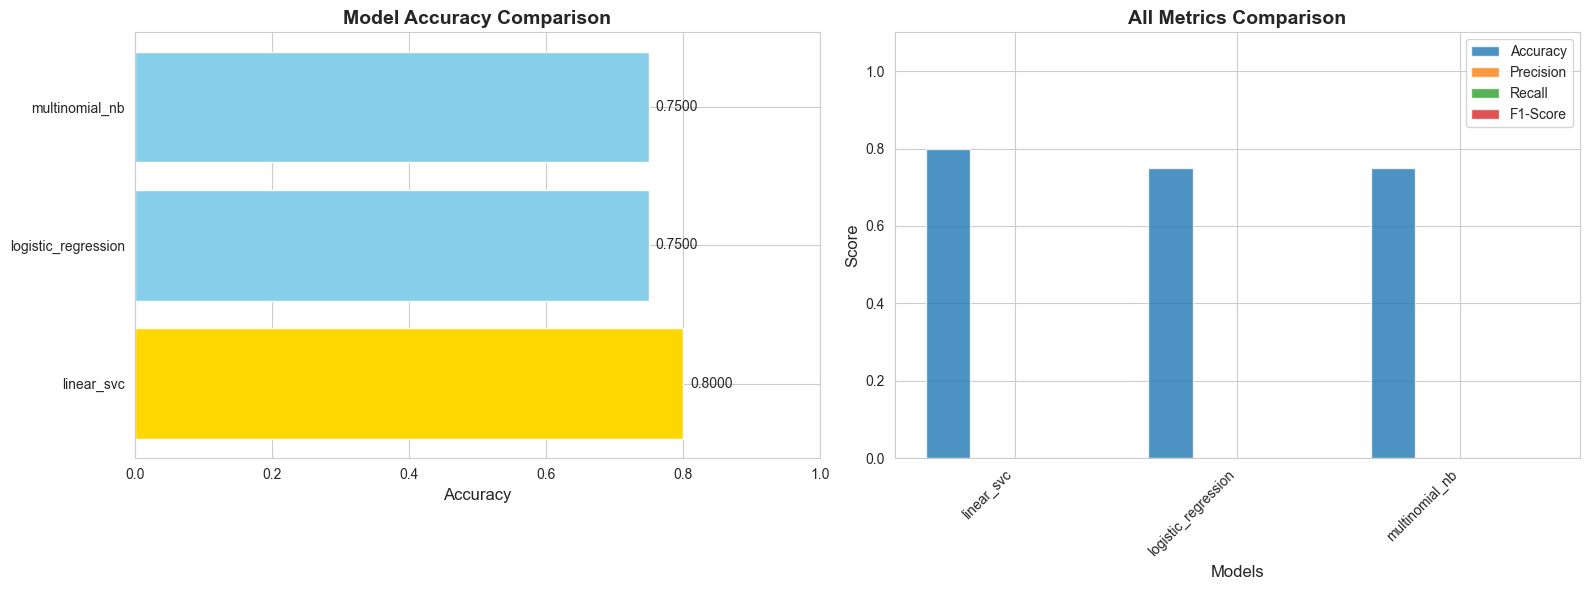

In [10]:
# Performance comparison plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy comparison
ax1 = axes[0]
colors = ['gold' if model == best_model_name else 'skyblue' for model in scores_df['Model']]
ax1.barh(scores_df['Model'], scores_df['Accuracy'], color=colors)
ax1.set_xlabel('Accuracy', fontsize=12)
ax1.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_xlim([0, 1])
for i, v in enumerate(scores_df['Accuracy']):
    ax1.text(v + 0.01, i, f'{v:.4f}', va='center')

# All metrics
ax2 = axes[1]
x = np.arange(len(scores_df))
width = 0.2
ax2.bar(x - width*1.5, scores_df['Accuracy'], width, label='Accuracy', alpha=0.8)
ax2.bar(x - width*0.5, scores_df['Precision'], width, label='Precision', alpha=0.8)
ax2.bar(x + width*0.5, scores_df['Recall'], width, label='Recall', alpha=0.8)
ax2.bar(x + width*1.5, scores_df['F1-Score'], width, label='F1-Score', alpha=0.8)
ax2.set_xlabel('Models', fontsize=12)
ax2.set_ylabel('Score', fontsize=12)
ax2.set_title('All Metrics Comparison', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(scores_df['Model'], rotation=45, ha='right')
ax2.legend()
ax2.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

## 7. Top Features Analysis

In [11]:
# Display selected features (top TF-IDF terms)
if results.get('selected_features'):
    selected_features = results['selected_features']
    print(f"✅ Selected Features: {len(selected_features)} terms\n")
    print("Top 30 important words/features:")
    print(selected_features[:30])
    
    # Visualize top features
    top_n = min(20, len(selected_features))
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_n), [1]*top_n, color='teal', alpha=0.7)
    plt.yticks(range(top_n), selected_features[:top_n])
    plt.xlabel('Relative Importance', fontsize=12)
    plt.title(f'Top {top_n} Selected Text Features', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("ℹ️ Feature selection information not available")

ℹ️ Feature selection information not available


## 8. Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions
best_eval = evaluation_results[best_model_name]
if 'y_true' in best_eval and 'y_pred' in best_eval:
    y_true = best_eval['y_true']
    y_pred = best_eval['y_pred']
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=categories, 
                yticklabels=categories)
    plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Classification report
    print("\n📋 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=categories))

## 9. Sample Predictions

In [13]:
# Show sample predictions
if 'y_true' in best_eval and 'y_pred' in best_eval:
    # Get test indices (assuming they're in order)
    test_size = len(y_true)
    test_indices = df_clean.index[-test_size:]
    
    print("🔍 Sample Predictions:\n")
    print("="*80)
    
    for i in range(min(5, len(test_indices))):
        idx = test_indices[i]
        true_label = categories[y_true[i]]
        pred_label = categories[y_pred[i]]
        text_sample = df_clean.iloc[idx]['text'][:150]
        
        status = "✅" if y_true[i] == y_pred[i] else "❌"
        
        print(f"\nSample {i+1} {status}")
        print(f"True: {true_label} | Predicted: {pred_label}")
        print(f"Text: {text_sample}...")
        print("-"*80)

## 10. Try Custom Text Data

In [14]:
# Example: SMS Spam Classification (simulated data)
spam_data = {
    'text': [
        'Win a free iPhone now! Click here',
        'Meeting at 3pm tomorrow',
        'Congratulations! You won $1000',
        'Can you pick up milk on your way home?',
        'URGENT: Your account will be closed',
        'Happy birthday! Hope you have a great day',
        'Free money! Limited time offer',
        'Lunch tomorrow at noon?',
    ] * 50,  # Repeat to have enough data
    'target': [1, 0, 1, 0, 1, 0, 1, 0] * 50  # 1=spam, 0=ham
}

df_spam = pd.DataFrame(spam_data)

print(f"Spam Dataset shape: {df_spam.shape}")
print(f"Spam vs Ham: {df_spam['target'].value_counts().to_dict()}")

# Run pipeline
print("\n🚀 Running AutoML on spam detection...")
results_spam = run_pipeline(
    dataset=df_spam,
    target_column='target',
    task_type='classification',
    feature_selection_enabled=True,
    hyperparameter_tuning_enabled=False,
    preprocessing_params={'text_col': 'text'}
)

best_spam = results_spam['best_model']['name']
best_metrics_spam = results_spam['evaluation_results'][best_spam]['metrics']

print(f"\n🏆 Best Model: {best_spam}")
print(f"Accuracy: {best_metrics_spam.get('accuracy', 0):.4f}")

2025-12-19 04:58:43,875 - automl.preprocessing - INFO - ======================================================================
2025-12-19 04:58:43,877 - automl.preprocessing - INFO - 🚀 AUTOML PREPROCESSING DISPATCHER
2025-12-19 04:58:43,878 - automl.preprocessing - INFO - ======================================================================
2025-12-19 04:58:43,879 - automl.preprocessing - INFO - 📌 Data type: text
2025-12-19 04:58:43,881 - automl.preprocessing - INFO - 📝 Routing to: text_preprocessing.preprocess_text()
2025-12-19 04:58:43,882 - automl.preprocessing - INFO - ======================================================================
2025-12-19 04:58:43,883 - automl.text_preprocessing - INFO - ============================================================
2025-12-19 04:58:43,885 - automl.text_preprocessing - INFO - Starting text data preprocessing...
2025-12-19 04:58:43,887 - automl.text_preprocessing - INFO - ============================================================
2025-12

Spam Dataset shape: (400, 2)
Spam vs Ham: {1: 200, 0: 200}

🚀 Running AutoML on spam detection...
==== AutoML Pipeline: Start ====
Detected data type: text
Preprocessing data...
Running feature selection...
Initial features: 48
Selected features: 20
Applying selected indices to train/val/test splits...
Training baseline models...
Training text model: LogisticRegression
Training text model: MultinomialNB
Training text model: LinearSVC
Evaluating models...
Evaluating model: logistic_regression
Evaluating model: multinomial_nb
Evaluating model: linear_svc
Selecting best model...
Model logistic_regression: F1-weighted=1.0000, Accuracy=1.0000, Precision=1.0000
Model multinomial_nb: F1-weighted=1.0000, Accuracy=1.0000, Precision=1.0000
Model linear_svc: F1-weighted=1.0000, Accuracy=1.0000, Precision=1.0000
Selected best model: logistic_regression. Reason: Highest weighted F1 (1.0000); tie-broken by accuracy (1.0000) and precision (1.0000).
==== AutoML Pipeline: Done ====

🏆 Best Model: logis

## 11. Summary

This notebook demonstrated:
- ✅ Loading and exploring text datasets
- ✅ Automatic TF-IDF vectorization
- ✅ Feature selection for text data
- ✅ Multiple classifier training and comparison
- ✅ Text-specific evaluation and visualization
- ✅ Sample prediction analysis

**Next Steps:**
- Try with your own text datasets (reviews, tweets, documents)
- Experiment with different preprocessing options
- Analyze misclassified examples
- Test on different text classification tasks